# Chapter 11 of Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems by Aurelien Geron
Using CIFAR10 dataset of image classification to train a deep neural network. This exercise compares the basic Model a model with batch normalisation, a model with SELU activation and final model using Alpha Dropout.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from functools import partial

In [6]:
CIFAR10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = CIFAR10.load_data()

In [12]:
X_train.shape

(50000, 32, 32, 3)

In [51]:
X_train_reduced = X_train[5000:]
y_train_reduced = y_train[5000:]
X_val = X_train[:5000]
y_val = y_train[:5000]

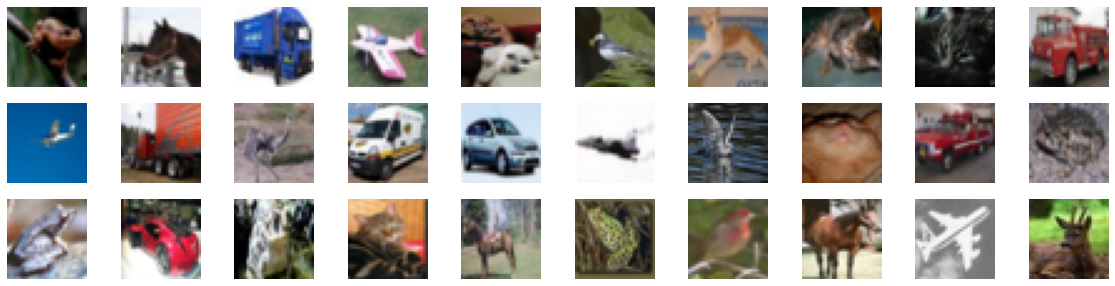

In [52]:
plt.figure(figsize=(20,5))
for image in range(30):
    plt.subplot(3,10,image+1)
    plt.imshow(X_train_reduced[image])
    plt.axis('off')
plt.show()

## Practice training a deep neural network on the CIFAR10 image dataset:
a. Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but
it’s the point of this exercise). Use He initialization and the ELU activation
function.<br>
<br>
b. Using Nadam optimization and early stopping, train the network on the
CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_
data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000
for training, 10,000 for testing) with 10 classes, so you’ll need a softmax out‐
put layer with 10 neurons. Remember to search for the right learning rate each
time you change the model’s architecture or hyperparameters.


## Technique used to find the optimal learning rate.

In [154]:
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(keras.backend.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        keras.backend.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [174]:
Denselayers = partial(keras.layers.Dense,
                            activation='elu',
                            kernel_initializer='he_normal'
)

CIFAR10_model_rate = keras.models.Sequential()
CIFAR10_model_rate.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for layer in range(20):
    CIFAR10_model_rate.add(Denselayers(100))

CIFAR10_model_rate.add(keras.layers.Dense(10, activation="softmax"))

In [175]:
optimiser = keras.optimizers.Nadam(lr=1e-3)
CIFAR10_model_rate.compile(loss='sparse_categorical_crossentropy', optimizer=optimiser, metrics=['accuracy'])

In [176]:
expon_lr = ExponentialLearningRate(factor=1.005)
rate_history = CIFAR10_model_rate.fit(X_train_reduced, y_train_reduced, 
                                                epochs=5, validation_data=(X_val, y_val),
                                                callbacks=[expon_lr])

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
45000/45000 [==============================] - 43s 959us/sample - loss: 32831926.0776 - accuracy: 0.1089 - val_loss: 2.7933 - val_accuracy: 0.1038
Epoch 2/5
45000/45000 [==============================] - 28s 617us/sample - loss: 468.6404 - accuracy: 0.1023 - val_loss: 3892.3813 - val_accuracy: 0.0972
Epoch 3/5
45000/45000 [==============================] - 28s 613us/sample - loss: 615528.0479 - accuracy: 0.0998 - val_loss: 4360846.5804 - val_accuracy: 0.1040
Epoch 4/5
45000/45000 [==============================] - 28s 626us/sample - loss: 853782219.3033 - accuracy: 0.1016 - val_loss: 10024570463.8464 - val_accuracy: 0.1010
Epoch 5/5
45000/45000 [==============================] - 28s 625us/sample - loss: 1166973826267.3635 - accuracy: 0.0984 - val_loss: 10203417604312.2695 - val_accuracy: 0.0972


Text(0, 0.5, 'Loss')

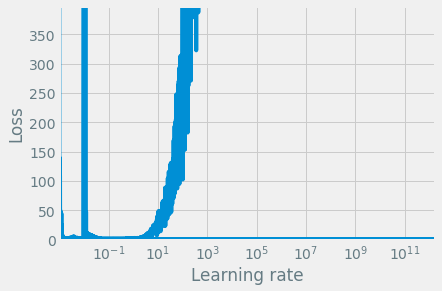

In [177]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.xlabel("Learning rate")
plt.ylabel("Loss")

## Basic Model

In [58]:
Denselayers = partial(keras.layers.Dense,
                            activation='elu',
                            kernel_initializer='he_normal'
)

CIFAR10_model1 = keras.models.Sequential()
CIFAR10_model1.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for layer in range(20):
    CIFAR10_model1.add(Denselayers(100))

CIFAR10_model1.add(keras.layers.Dense(10, activation="softmax"))

In [59]:
optimiser = keras.optimizers.Nadam(lr=5e-5)
CIFAR10_model1.compile(loss='sparse_categorical_crossentropy', optimizer=optimiser, metrics=['accuracy'])

In [60]:
earl_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint('CIFAR10_model1.h5', save_best_only=True)

CIFAR10_model1_history = CIFAR10_model1.fit(X_train_reduced, y_train_reduced, 
                                                epochs=100, validation_data=(X_val, y_val),
                                                callbacks=[earl_stopping_cb, checkpoint_cb])

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 49s 1ms/sample - loss: 4.6008 - accuracy: 0.1864 - val_loss: 2.2196 - val_accuracy: 0.2100
Epoch 2/100
45000/45000 [==============================] - 28s 623us/sample - loss: 2.0522 - accuracy: 0.2524 - val_loss: 1.9927 - val_accuracy: 0.2810
Epoch 3/100
45000/45000 [==============================] - 29s 639us/sample - loss: 1.9379 - accuracy: 0.2935 - val_loss: 1.9083 - val_accuracy: 0.3002
Epoch 4/100
45000/45000 [==============================] - 28s 612us/sample - loss: 1.8586 - accuracy: 0.3222 - val_loss: 1.8713 - val_accuracy: 0.3140
Epoch 5/100
45000/45000 [==============================] - 27s 608us/sample - loss: 1.8026 - accuracy: 0.3429 - val_loss: 1.8618 - val_accuracy: 0.3250
Epoch 6/100
45000/45000 [==============================] - 30s 671us/sample - loss: 1.7519 - accuracy: 0.3641 - val_loss: 1.7986 - val_accuracy: 0.3468
Epoch 7/100
45000/45000 [================

In [69]:
CIFAR10_model1.evaluate(X_test, y_test)

10000/10000 [==============================] - 6s 582us/sample - loss: 1.4911 - accuracy: 0.4759


[1.491143678665161, 0.4759]

<AxesSubplot:>

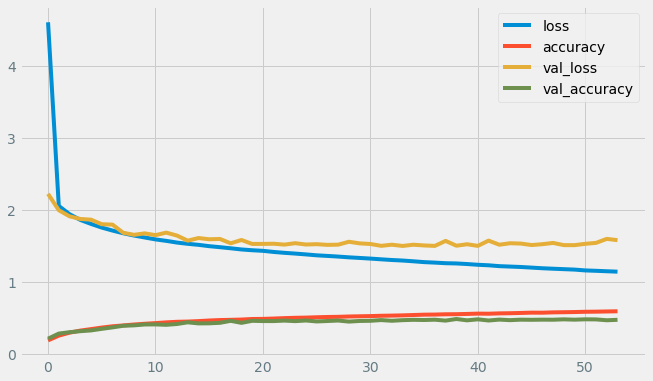

In [139]:
plt.style.use('fivethirtyeight')
#plt.style.use('Solarize_Light2')
pd.DataFrame(CIFAR10_model1_history.history).plot(figsize=(10, 6))

## Batch Normalisation
c. Now try adding Batch Normalization and compare the learning curves: Is it
converging faster than before? Does it produce a better model? How does it
affect training speed?

In [65]:
Denselayers = partial(keras.layers.Dense,
                            activation='elu',
                            kernel_initializer='he_normal'
)

CIFAR10_model2 = keras.models.Sequential()
CIFAR10_model2.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for layer in range(20):
    CIFAR10_model2.add(Denselayers(100))
    CIFAR10_model2.add(keras.layers.BatchNormalization())

CIFAR10_model2.add(keras.layers.Dense(10, activation="softmax"))
CIFAR10_model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_105 (Dense)            (None, 100)               307300    
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_106 (Dense)            (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_107 (Dense)            (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)              

In [66]:
optimiser = keras.optimizers.Nadam(lr=5e-5)
CIFAR10_model2.compile(loss='sparse_categorical_crossentropy', optimizer=optimiser, metrics=['accuracy'])

In [67]:
earl_stopping_cb2 = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
checkpoint_cb2 = keras.callbacks.ModelCheckpoint('CIFAR10_model2.h5', save_best_only=True)

CIFAR10_model2_history = CIFAR10_model2.fit(X_train_reduced, y_train_reduced, 
                                                epochs=100, validation_data=(X_val, y_val),
                                                callbacks=[earl_stopping_cb2, checkpoint_cb2])

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 74s 2ms/sample - loss: 2.2850 - accuracy: 0.2071 - val_loss: 2.0139 - val_accuracy: 0.2754
Epoch 2/100
45000/45000 [==============================] - 41s 907us/sample - loss: 1.9493 - accuracy: 0.2969 - val_loss: 1.8812 - val_accuracy: 0.3246
Epoch 3/100
45000/45000 [==============================] - 39s 874us/sample - loss: 1.8510 - accuracy: 0.3363 - val_loss: 1.8297 - val_accuracy: 0.3438
Epoch 4/100
45000/45000 [==============================] - 41s 909us/sample - loss: 1.7809 - accuracy: 0.3609 - val_loss: 1.7259 - val_accuracy: 0.3826
Epoch 5/100
45000/45000 [==============================] - 40s 889us/sample - loss: 1.7291 - accuracy: 0.3808 - val_loss: 1.6648 - val_accuracy: 0.4028
Epoch 6/100
45000/45000 [==============================] - 40s 880us/sample - loss: 1.6902 - accuracy: 0.3958 - val_loss: 1.6328 - val_accuracy: 0.4208
Epoch 7/100
45000/45000 [================

In [70]:
CIFAR10_model2.evaluate(X_test, y_test)

10000/10000 [==============================] - 6s 626us/sample - loss: 1.4351 - accuracy: 0.5045


[1.4350519037246705, 0.5045]

In [ ]:
model1_training = pd.DataFrame(CIFAR10_model1_history.history)
model2_training = pd.DataFrame(CIFAR10_model2_history.history)

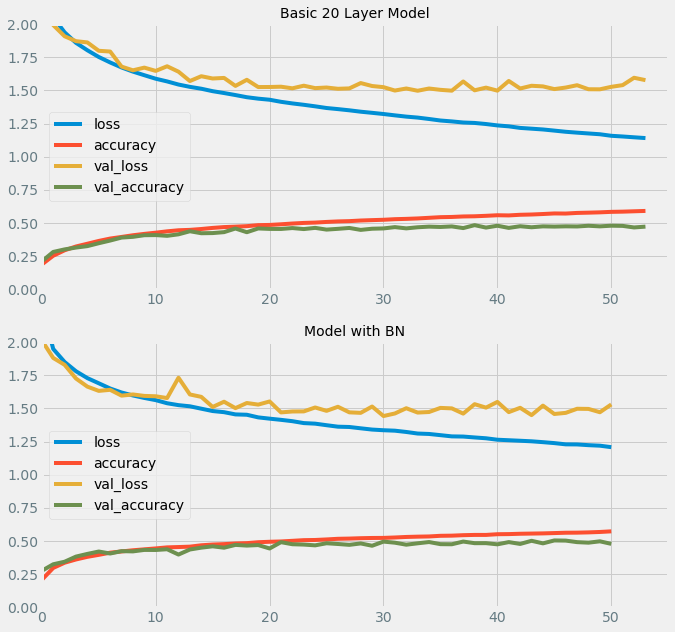

In [143]:
plt.figure(figsize=(10, 10))

plt.subplot(211)
plt.plot(model1_training)
plt.axis([0,55,0,2])
plt.legend(model1_training.columns)
plt.title("Basic 20 Layer Model", fontsize=14)

plt.subplot(212)
plt.plot(model2_training)
plt.axis([0,55,0,2])
plt.legend(model2_training.columns)
plt.title("Model with BN", fontsize=14)
plt.show()

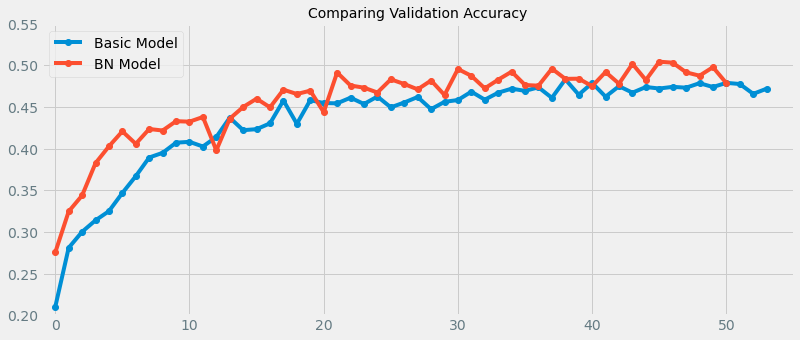

In [181]:
val_acc = pd.concat([model1_training['val_accuracy'], model2_training['val_accuracy']], axis=1)
plt.figure(figsize=(12, 5))
plt.plot(val_acc, 'o-')
plt.axis([-1,55,0.2,0.55])
plt.title("Comparing Validation Accuracy", fontsize=14)
plt.legend(['Basic Model', 'BN Model'])
plt.show()

## SELU Model
d. Try replacing Batch Normalization with SELU, and make the necessary adjustements to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).

In [235]:
keras.backend.clear_session()
tf.random.set_seed(0)
np.random.seed(0)
Denselayers = partial(keras.layers.Dense,
                            activation='selu',
                            kernel_initializer='lecun_normal'
)

CIFAR10_model3a = keras.models.Sequential()
CIFAR10_model3a.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for layer in range(20):
    CIFAR10_model3a.add(Denselayers(100))

CIFAR10_model3a.add(keras.layers.Dense(10, activation="softmax"))
CIFAR10_model3a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [237]:
optimiser = keras.optimizers.Nadam(lr=7e-4)
CIFAR10_model3a.compile(loss='sparse_categorical_crossentropy', optimizer=optimiser, metrics=['accuracy'])

In [238]:
earl_stopping_cb3a = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
checkpoint_cb3a = keras.callbacks.ModelCheckpoint('CIFAR10_model3a2.h5', save_best_only=True)

CIFAR10_model3_historya = CIFAR10_model3a.fit(X_train_reduced, y_train_reduced, 
                                                epochs=100, validation_data=(X_val, y_val),
                                                callbacks=[earl_stopping_cb3a, checkpoint_cb3a])

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 56s 1ms/sample - loss: 2.0984 - accuracy: 0.2219 - val_loss: 1.9636 - val_accuracy: 0.2642
Epoch 2/100
45000/45000 [==============================] - 29s 654us/sample - loss: 1.8881 - accuracy: 0.3052 - val_loss: 1.8256 - val_accuracy: 0.3266
Epoch 3/100
45000/45000 [==============================] - 29s 655us/sample - loss: 1.8322 - accuracy: 0.3309 - val_loss: 1.9549 - val_accuracy: 0.2834
Epoch 4/100
45000/45000 [==============================] - 29s 647us/sample - loss: 1.7969 - accuracy: 0.3466 - val_loss: 1.7849 - val_accuracy: 0.3478
Epoch 5/100
45000/45000 [==============================] - 36s 799us/sample - loss: 1.7542 - accuracy: 0.3657 - val_loss: 1.7987 - val_accuracy: 0.3536
Epoch 6/100
45000/45000 [==============================] - 37s 818us/sample - loss: 1.7897 - accuracy: 0.3547 - val_loss: 1.8627 - val_accuracy: 0.3360
Epoch 7/100
45000/45000 [================

In [239]:
CIFAR10_model3a.evaluate(X_test, y_test)

10000/10000 [==============================] - 6s 611us/sample - loss: 1.5176 - accuracy: 0.4597


[1.5175833848953246, 0.4597]

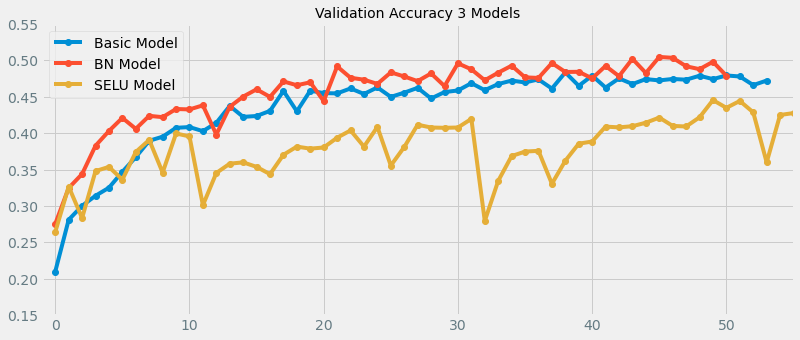

In [250]:
val_acc_3_models = pd.concat([val_acc, pd.DataFrame(CIFAR10_model3_historya.history)['val_accuracy']], axis=1)
plt.figure(figsize=(12, 5))
plt.plot(val_acc_3_models, 'o-')
plt.axis([-1,55,0.15,0.55])
plt.title("Validation Accuracy 3 Models", fontsize=14)
plt.legend(['Basic Model', 'BN Model', 'SELU Model'])
plt.show()

## SELU and Alpha Dropout 
e. Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC Dropout.

In [241]:
keras.backend.clear_session()
tf.random.set_seed(0)
np.random.seed(0)
Denselayers = partial(keras.layers.Dense,
                            activation='selu',
                            kernel_initializer='lecun_normal'
)

CIFAR10_model4a = keras.models.Sequential()
CIFAR10_model4a.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for layer in range(20):
    CIFAR10_model4a.add(Denselayers(100))
CIFAR10_model4a.add(keras.layers.AlphaDropout(rate=0.1))

CIFAR10_model4a.add(keras.layers.Dense(10, activation="softmax"))

In [242]:
optimiser = keras.optimizers.Nadam(lr=5e-4)
CIFAR10_model4a.compile(loss='sparse_categorical_crossentropy', optimizer=optimiser, metrics=['accuracy'])

In [243]:
earl_stopping_cb4a = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
checkpoint_cb4a = keras.callbacks.ModelCheckpoint('CIFAR10_model4a.h5', save_best_only=True)

CIFAR10_model4_historya = CIFAR10_model4.fit(X_train_reduced, y_train_reduced, 
                                                epochs=100, validation_data=(X_val, y_val),
                                                callbacks=[earl_stopping_cb4a, checkpoint_cb4a])

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 42s 939us/sample - loss: 1.7362 - accuracy: 0.3722 - val_loss: 1.7504 - val_accuracy: 0.3708
Epoch 2/100
45000/45000 [==============================] - 31s 693us/sample - loss: 1.7206 - accuracy: 0.3791 - val_loss: 1.7343 - val_accuracy: 0.3918
Epoch 3/100
45000/45000 [==============================] - 32s 716us/sample - loss: 1.7303 - accuracy: 0.3748 - val_loss: 1.9930 - val_accuracy: 0.2426
Epoch 4/100
45000/45000 [==============================] - 34s 746us/sample - loss: 1.8739 - accuracy: 0.2989 - val_loss: 1.8958 - val_accuracy: 0.3050
Epoch 5/100
45000/45000 [==============================] - 34s 758us/sample - loss: 1.7847 - accuracy: 0.3436 - val_loss: 1.7698 - val_accuracy: 0.3604
Epoch 6/100
45000/45000 [==============================] - 31s 700us/sample - loss: 1.7440 - accuracy: 0.3654 - val_loss: 1.7544 - val_accuracy: 0.3628
Epoch 7/100
45000/45000 [==============

In [244]:
CIFAR10_model4a.evaluate(X_test, y_test)

10000/10000 [==============================] - 10s 976us/sample - loss: 3.3611 - accuracy: 0.0874


[3.361077727508545, 0.0874]

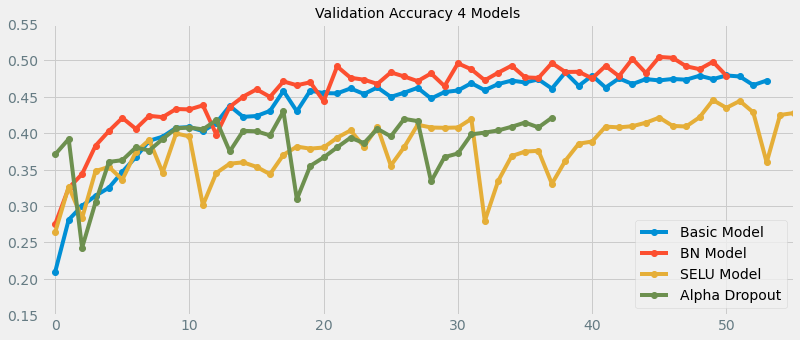

In [249]:
val_acc_4_models = pd.concat([val_acc_3_models, pd.DataFrame(CIFAR10_model4_historya.history)['val_accuracy']], axis=1)
plt.figure(figsize=(12, 5))
plt.plot(val_acc_4_models, 'o-')
plt.axis([-1,55,0.15,0.55])
plt.title("Validation Accuracy 4 Models", fontsize=14)
plt.legend(['Basic Model', 'BN Model', 'SELU Model', 'Alpha Dropout'])
plt.show()